In [108]:
# Import pandas that allows us to view and manipulate data
import numpy as np
import pandas as pd

# Import libraries to help us do the modeling
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.mixture import GaussianMixture
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.decomposition import PCA

# Import visualisation libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Import warnings and ignore if warnings are shown
import warnings
warnings.filterwarnings('ignore')

In [107]:
import os
os.chdir('C:\\Users\\davia\\OneDrive - Singapore Polytechnic\\SP\\Year 1 Sem 2\\ST15101 (AIML) AI & Machine Learning\\CA2\\Dataset')

In [109]:
df = pd.read_csv('Student_Performance_dataset.csv')

### 1. Data Pre-Processing

#### 1.1 Data Exploration & Removing Unnecessary Columns

In [110]:
# Finding out the types of data in each column
df.dtypes

Student_ID         int64
Gender            object
Age                int64
English_Score    float64
Math_Score       float64
Science_Score      int64
dtype: object

In [111]:
df

,Student_ID,Gender,Age,English_Score,Math_Score,Science_Score
0,1,Female,18,64.0,56.0,60
1,2,Female,12,89.0,71.0,97
2,3,Female,18,69.0,69.0,80
3,4,Female,17,60.0,72.0,97
4,5,Male,13,71.0,76.0,76
...,...,...,...,...,...,...
995,996,Female,14,64.0,55.0,77
996,997,Genderqueer,14,66.0,60.0,56
997,998,Male,16,82.0,81.0,74
998,999,Male,14,76.0,62.0,62


#### 1.1.1 Data exploration for Age column

<Axes: xlabel='Age', ylabel='Count'>

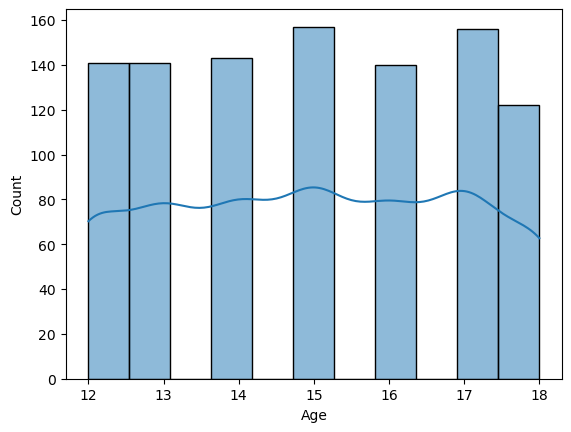

In [112]:
sns.histplot(df['Age'], kde=True)

The distribution of age is not normal and is almost equally distributed

<Axes: >

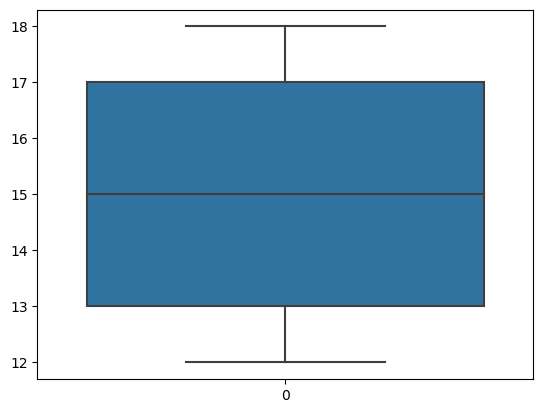

In [113]:
sns.boxplot(df['Age'])

The maximum value is 18 while the minimum value is 12 with the median being 15.

#### 1.1.2 Data exploration for English column

<Axes: xlabel='English_Score', ylabel='Count'>

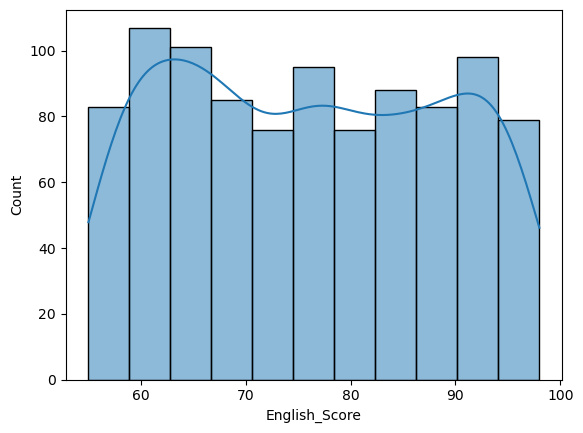

In [114]:
sns.histplot(df['English_Score'], kde=True)

The distribution of English Scores is not normal and is almost equally distributed

<Axes: >

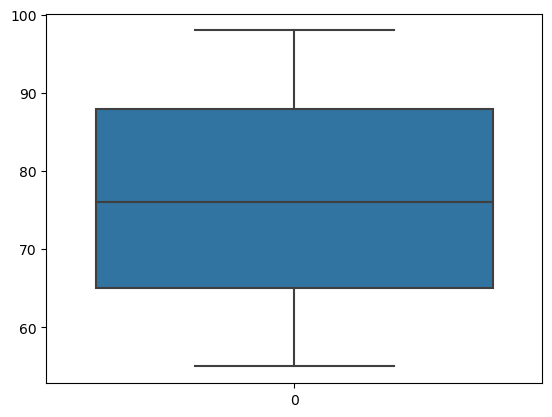

In [115]:
sns.boxplot(df['English_Score'])

The minimum value is 55 while the maximum value is 98 and the median value is 76

#### 1.1.3 Data exploration for Math column

<Axes: xlabel='Math_Score', ylabel='Count'>

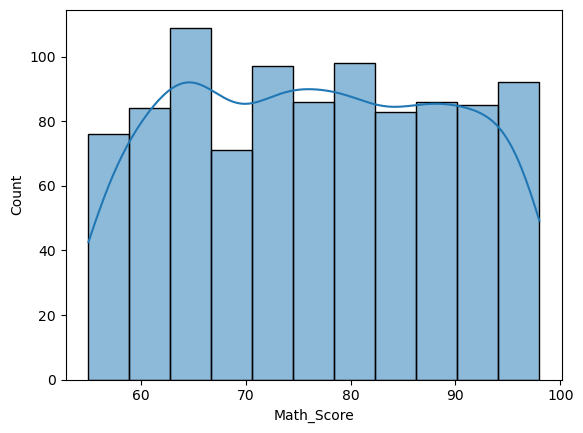

In [116]:
sns.histplot(df['Math_Score'], kde=True)

The distribution of Math Scores is not normal and is almost equally distributed

<Axes: >

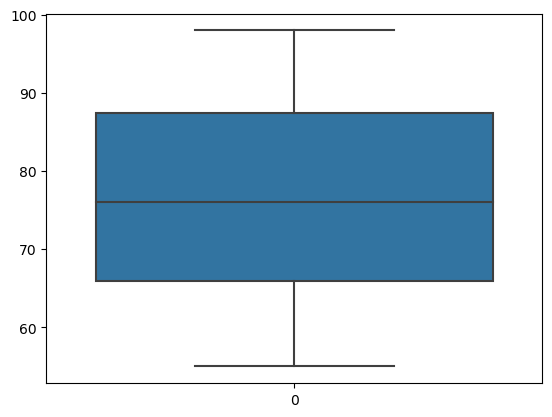

In [117]:
sns.boxplot(df['Math_Score'])

The minimum value is 55 while the maximum value is 98 and the median value is 76

#### 1.1.4 Data exploration for Science column

<Axes: xlabel='Science_Score', ylabel='Count'>

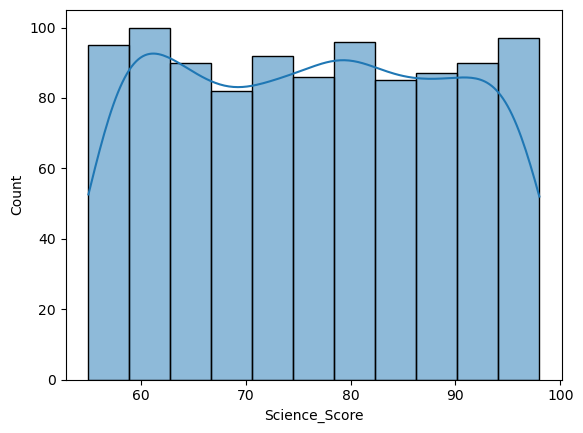

In [118]:
sns.histplot(df['Science_Score'], kde=True)

The distribution of Science Scores is not normal and is almost equally distributed

<Axes: >

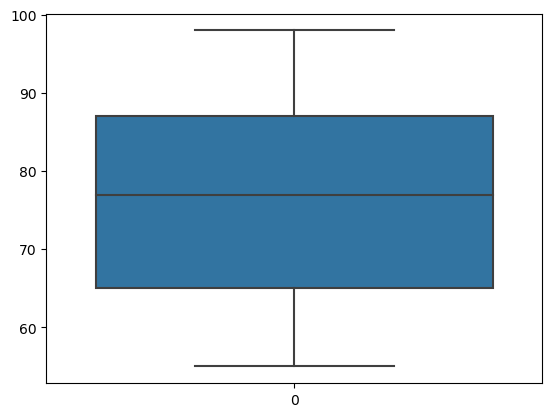

In [119]:
sns.boxplot(df['Science_Score'])

The minimum value is 55 while the maximum value is 98 and the median value is 77

#### 1.1.5 Removing unnecessary columns

In [120]:
# Student_ID does not make sense
df.drop(['Student_ID'], axis=1, inplace=True)

#### 1.2 One-Hot Encoding

There is a column that needs to be converted into a dummy variable which is Gender

In [121]:
df_dummies = pd.get_dummies(df[['Gender']], drop_first=True, dtype='int')
df = pd.concat([df,df_dummies], axis=1)
df = df.drop(['Gender'], axis=1)
df.head()

,Age,English_Score,Math_Score,Science_Score,Gender_Bigender,Gender_Female,Gender_Genderfluid,Gender_Genderqueer,Gender_Male,Gender_Non-binary,Gender_Polygender
0,18,64.0,56.0,60,0,1,0,0,0,0,0
1,12,89.0,71.0,97,0,1,0,0,0,0,0
2,18,69.0,69.0,80,0,1,0,0,0,0,0
3,17,60.0,72.0,97,0,1,0,0,0,0,0
4,13,71.0,76.0,76,0,0,0,0,1,0,0


#### 1.3 Check Null Values

<Axes: >

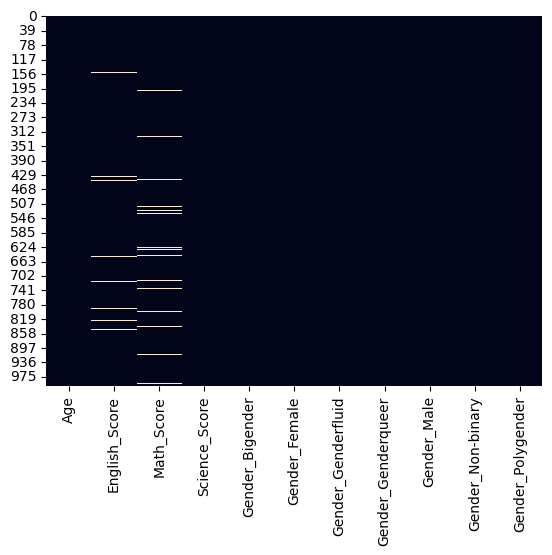

In [122]:
# Print out a heatmap to show how much missing data there is in the dataset
sns.heatmap(df.isnull(), cbar=False)

In [123]:
# See the count of the amount of missing data in the dataset
df.isnull().sum()

Age                    0
English_Score         29
Math_Score            33
Science_Score          0
Gender_Bigender        0
Gender_Female          0
Gender_Genderfluid     0
Gender_Genderqueer     0
Gender_Male            0
Gender_Non-binary      0
Gender_Polygender      0
dtype: int64

Since only a small amount of rows are missing data and only missing one or 2 columns in each row, it would be more beneficial to impute the data instead of removing it

In [124]:
# Impute the missing values in English_Score and Math_Score with the column's median
df['English_Score'] = df['English_Score'].fillna(df['English_Score'].median())
df['Math_Score'] = df['Math_Score'].fillna(df['Math_Score'].median())

<Axes: >

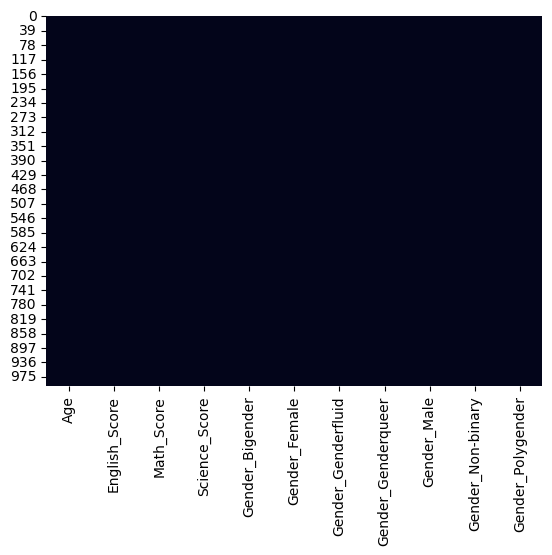

In [125]:
# Print out a heatmap to show how much missing data there is in the dataset
sns.heatmap(df.isnull(), cbar=False)

#### 1.4 Check For Outliers

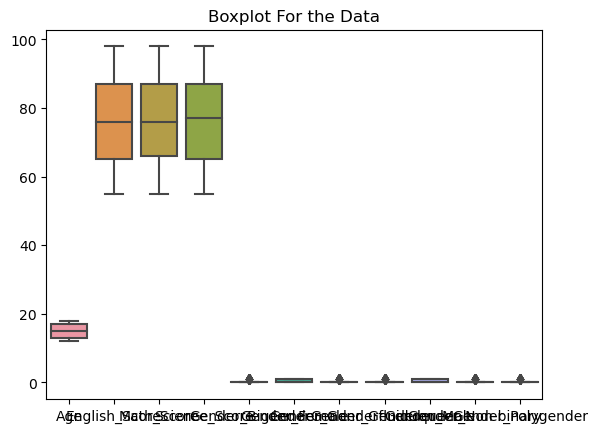

In [126]:
sns.boxplot(df)
plt.title("Boxplot For the Data")
plt.show()

There is no outliers in the dataset. As such there is no need to remove anything.

#### 1.5 Standardization Of Dataset 

We use standardization to reduce bias of features.

In [127]:
std_scaler = StandardScaler()
df_scaled = df.copy()
df_scaled[['Age', 'English_Score', 'Math_Score', 'Science_Score']] = std_scaler.fit_transform(df_scaled[['Age', 'English_Score', 'Math_Score', 'Science_Score']])

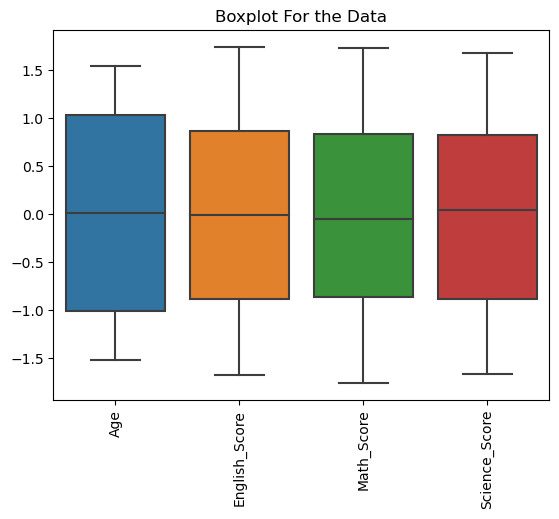

In [128]:
sns.boxplot(df_scaled[['Age', 'English_Score', 'Math_Score', 'Science_Score']])
plt.title("Boxplot For the Data")
plt.xticks(rotation=90)
plt.show()

In [129]:
df_scaled

,Age,English_Score,Math_Score,Science_Score,Gender_Bigender,Gender_Female,Gender_Genderfluid,Gender_Genderqueer,Gender_Male,Gender_Non-binary,Gender_Polygender
0,1.546825,-0.961257,-1.674327,-1.272918,0,1,0,0,0,0,0
1,-1.516194,1.026948,-0.457461,1.604172,0,1,0,0,0,0,0
2,1.546825,-0.563616,-0.619709,0.282266,0,1,0,0,0,0,0
3,1.036321,-1.279370,-0.376336,1.604172,0,1,0,0,0,0,0
4,-1.005691,-0.404560,-0.051838,-0.028771,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
995,-0.495188,-0.961257,-1.755451,0.048988,0,1,0,0,0,0,0
996,-0.495188,-0.802201,-1.349829,-1.583955,0,0,0,1,0,0,0
997,0.525818,0.470250,0.353784,-0.184289,0,0,0,0,1,0,0
998,-0.495188,-0.006919,-1.187580,-1.117400,0,0,0,0,1,0,0


### 2. Clustering

In [130]:
X = df_scaled.copy()

#### 2.1 PCA

In [131]:
# Perform PCA
pca = PCA(n_components=2)  # Adjust n_components as needed
X_pca = pca.fit_transform(X)

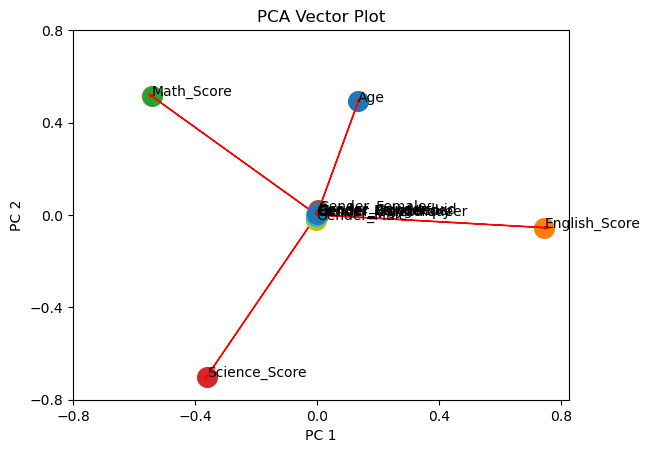

In [132]:
# Principal components correlation coefficients
loadings = pca.components_
 
# Number of features before PCA
n_features = pca.n_features_in_
 
# Feature names before PCA
feature_names = X.columns
 
# PC names
pc_list = [f'PC{i}' for i in list(range(1, n_features + 1))]
 
# Match PC names to loadings
pc_loadings = dict(zip(pc_list, loadings))
 
# Matrix of corr coefs between feature names and PCs
loadings_df = pd.DataFrame.from_dict(pc_loadings)
loadings_df['feature_names'] = feature_names
loadings_df = loadings_df.set_index('feature_names')
loadings_df

# Get the loadings of x and y axes
xs = loadings[0]
ys = loadings[1]
 
# Plot the loadings on a scatterplot
for i, varnames in enumerate(feature_names):
    plt.scatter(xs[i], ys[i], s=200)
    plt.arrow(
        0, 0, # coordinates of arrow base
        xs[i], # length of the arrow along x
        ys[i], # length of the arrow along y
        color='r', 
        head_width=0.01
        )
    plt.text(xs[i], ys[i], varnames)
 
# Define the axes
xticks = np.linspace(-0.8, 0.8, num=5)
yticks = np.linspace(-0.8, 0.8, num=5)
plt.xticks(xticks)
plt.yticks(yticks)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
 
# Show plot
plt.title('PCA Vector Plot')
plt.show()

PC1 is positively associated with English score and negatively associated with Science score and Math score. PC2 is positively associated with Age and Math score while negatively associated with Science score.

#### 2.1 K-Means Clustering

In [133]:
silhouetteResults = []
inertia = []

# Perform k-means clustering and plot the silhouette plots for k=2, k=3, and k=4
for i, k in enumerate([2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]):
    # Perform k-means clustering
    kmeans = KMeans(n_clusters=k, n_init=10,random_state=0).fit(X_pca)
    cluster_labels = kmeans.labels_

    # Calculate the silhouette score
    silhouette_avg = silhouette_score(X_pca, cluster_labels)
    print(f"For n_clusters = {k}, the average silhouette_score is : {silhouette_avg}")
    silhouetteResults.append(silhouette_avg)
    inertia.append(kmeans.inertia_)

For n_clusters = 2, the average silhouette_score is : 0.32317317438592186
For n_clusters = 3, the average silhouette_score is : 0.353260165328163
For n_clusters = 4, the average silhouette_score is : 0.3330236366878028
For n_clusters = 5, the average silhouette_score is : 0.32729908909652305
For n_clusters = 6, the average silhouette_score is : 0.35719768198139046
For n_clusters = 7, the average silhouette_score is : 0.35130101449603623
For n_clusters = 8, the average silhouette_score is : 0.3352621131917292
For n_clusters = 9, the average silhouette_score is : 0.3248105580961891
For n_clusters = 10, the average silhouette_score is : 0.32790365745524674
For n_clusters = 11, the average silhouette_score is : 0.3342121778479768
For n_clusters = 12, the average silhouette_score is : 0.3350619958584883
For n_clusters = 13, the average silhouette_score is : 0.3398894797331997
For n_clusters = 14, the average silhouette_score is : 0.33685607677219526
For n_clusters = 15, the average silhouet

#### 2.1.1 Choosing Optimal k using the 'Elbow Method'

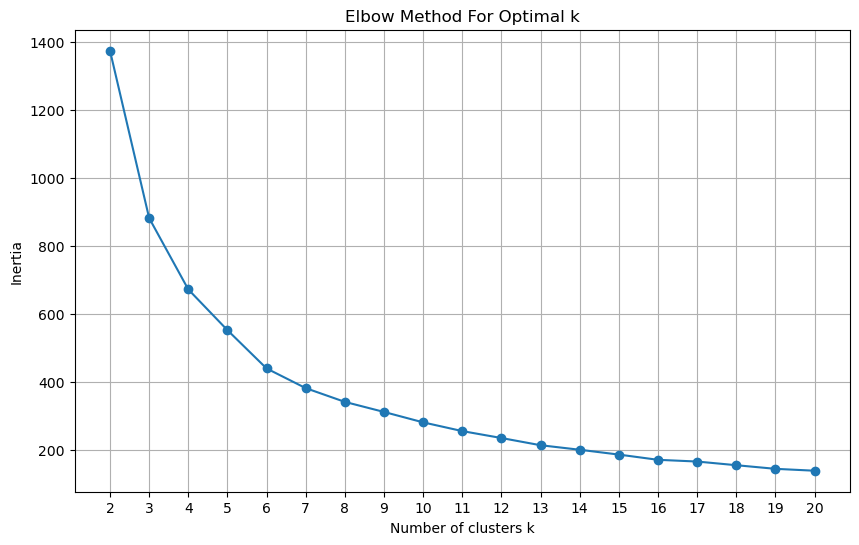

In [134]:
# Plot the elbow method graph
plt.figure(figsize=(10, 6))
plt.plot(range(2, 21), inertia, marker='o', linestyle='-')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters k')
plt.ylabel('Inertia')
plt.xticks(range(2, 21))
plt.grid(True)
plt.show()

The Elbow Method says that the optimal value of k is 3.

#### 2.1.2 Choosing the Optimal k using the 'Silhouette Method'

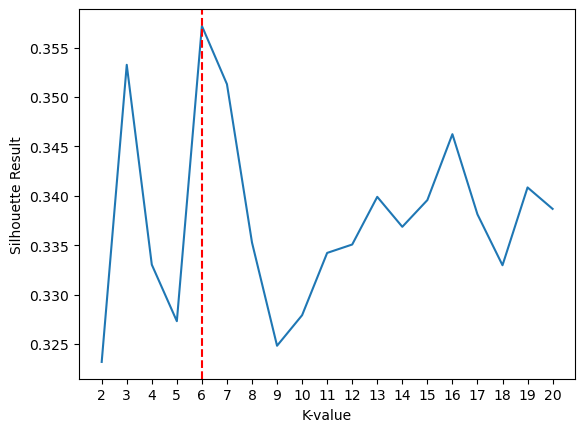

In [135]:
count = 0

plotX_value = []

for i in silhouetteResults:
    plotX_value.append(count+2)
    count += 1

sns.lineplot(silhouetteResults)
plt.xticks(np.arange(0, len(silhouetteResults)), plotX_value)
plt.axvline(x=np.array(silhouetteResults).argmax(), color="red", linestyle="--")
plt.xlabel('K-value')
plt.ylabel('Silhouette Result')
plt.show()

As we can see from the graph, the k-value with the highest silhouette result is 6 at 0.35719768198139046

The elbow method and silhouette score differs in terms of what the optimal k value is. In this case, I have decided to use k=6 as the optimal k as having more clusters would help us gain more insight from the dataset.

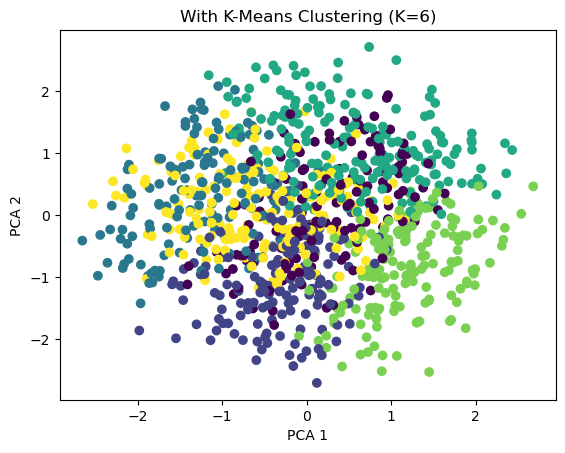

In [136]:
kmeans = KMeans(n_clusters=6, n_init=10,random_state=0).fit(X)
centroids = kmeans.cluster_centers_

df['kmeans_pred'] = kmeans.labels_

# Plotting the scatter plot for KMeans clustering
plt.scatter(x=X_pca[:, 0], y=X_pca[:, 1], c=kmeans.labels_)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('With K-Means Clustering (K=6)')
plt.show()

#### 2.2 GMM Clustering

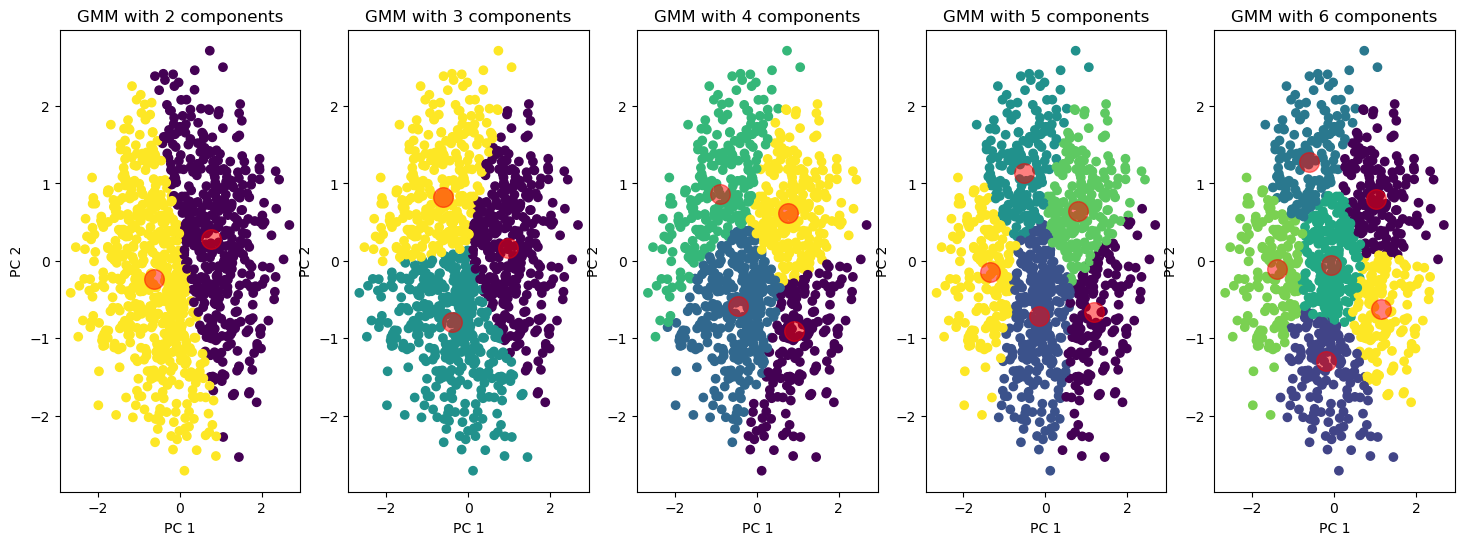

In [137]:
fig, axes = plt.subplots(1, 5, figsize=(18, 6))  # 1 row, 3 columns

# Loop over each n_components (2 to 4)
for i, n in enumerate(range(2, 7)):
    # Create GMM
    gmm = GaussianMixture(n_components=n, random_state=0)
    gmm.fit(X_pca)
    labels = gmm.predict(X_pca)

    # Plotting
    axes[i].scatter(x=X_pca[:, 0], y=X_pca[:, 1], c=labels)
    
    # Plot the 'centers' (means of the Gaussian distributions)
    axes[i].scatter(gmm.means_[:, 0], gmm.means_[:, 1], c='red', s=200, alpha=0.5)  # gmm.means_ are the centers
    axes[i].set_title(f'GMM with {n} components')
    axes[i].set_xlabel('PC 1')
    axes[i].set_ylabel('PC 2')

plt.show()

For components = 2, the average silhouette_score is : 0.3237440298899032
For components = 3, the average silhouette_score is : 0.34691175381519335
For components = 4, the average silhouette_score is : 0.332158969462453
For components = 5, the average silhouette_score is : 0.3297580786076668
For components = 6, the average silhouette_score is : 0.354874534270515
For components = 7, the average silhouette_score is : 0.3467794915740893
For components = 8, the average silhouette_score is : 0.33010026479252597
For components = 9, the average silhouette_score is : 0.31787748511447295
For components = 10, the average silhouette_score is : 0.31644433461291493
For components = 11, the average silhouette_score is : 0.31581831991352427
For components = 12, the average silhouette_score is : 0.32209924232486004
For components = 13, the average silhouette_score is : 0.32125301774276216
For components = 14, the average silhouette_score is : 0.3250436495529042
For components = 15, the average silhouet

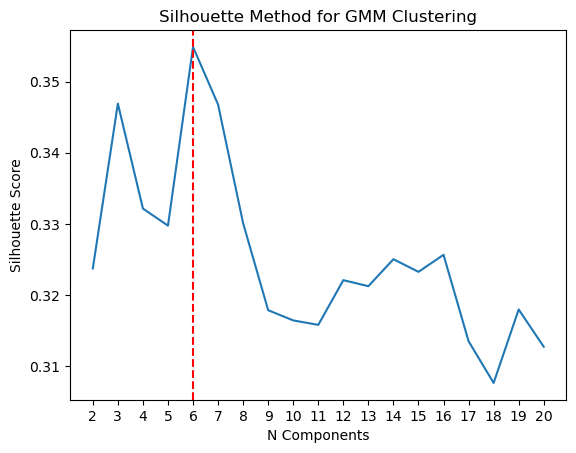

In [142]:
# Perform GMM clustering and compute Silhouette scores
silhouette_scores = []

# Loop over each n_components (2 to 20)
for i, n in enumerate(range(2, 21)):
    # Create GMM
    gmm = GaussianMixture(n_components=n, random_state=0)
    gmm.fit(X_pca)
    labels = gmm.predict(X_pca)
    silhouette_scores.append(silhouette_score(X_pca, labels))
    print(f"For components = {n}, the average silhouette_score is : {silhouette_score(X_pca, labels)}")

# Plot Silhouette scores
plt.plot(range(2, 21), silhouette_scores)
plt.xticks(range(2, 21))
plt.xlabel('N Components')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method for GMM Clustering')
plt.axvline(x=np.array(silhouette_scores).argmax()+2, color="red", linestyle="--")
plt.show()

As we can see from the graph, the n component with the highest silhouette result is 6 at 0.35487453427051535

In [139]:
gmm = GaussianMixture(n_components=6, random_state=0)
gmm.fit(X_pca)
labels = gmm.predict(X_pca)

df['gmm_pred'] = labels

### 3. Seeing characteristics of each student cluster

#### 3.1 K-Means 

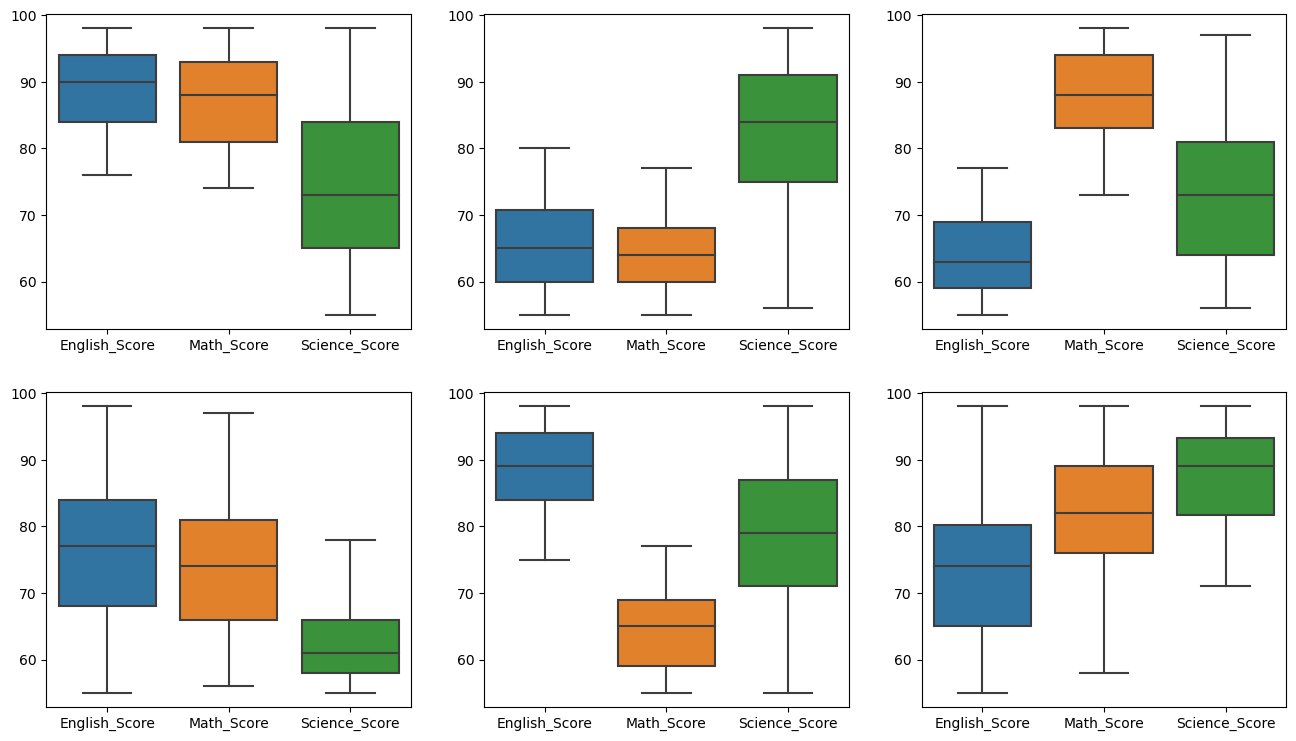

In [140]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2,3,figsize=(16,9))

sns.boxplot(df[df.kmeans_pred == 0][['English_Score', 'Math_Score', 'Science_Score']], ax=ax1)
sns.boxplot(df[df.kmeans_pred == 1][['English_Score', 'Math_Score', 'Science_Score']], ax=ax2)
sns.boxplot(df[df.kmeans_pred == 2][['English_Score', 'Math_Score', 'Science_Score']], ax=ax3)
sns.boxplot(df[df.kmeans_pred == 3][['English_Score', 'Math_Score', 'Science_Score']], ax=ax4)
sns.boxplot(df[df.kmeans_pred == 4][['English_Score', 'Math_Score', 'Science_Score']], ax=ax5)
sns.boxplot(df[df.kmeans_pred == 5][['English_Score', 'Math_Score', 'Science_Score']], ax=ax6)

plt.show()

- The first cluster has high English scores and high Math scores but low Science score.
- The second cluster has high Science score but low English and Math score.
- The third cluster has high Math score but low English and Science score.
- The fourth cluster has high English and Math score but low Science score.
- The fifth cluster has high English and Science score but low Math score.
- The sixth cluster has high scores in all 3 subjects

#### 3.2 GMM Clustering

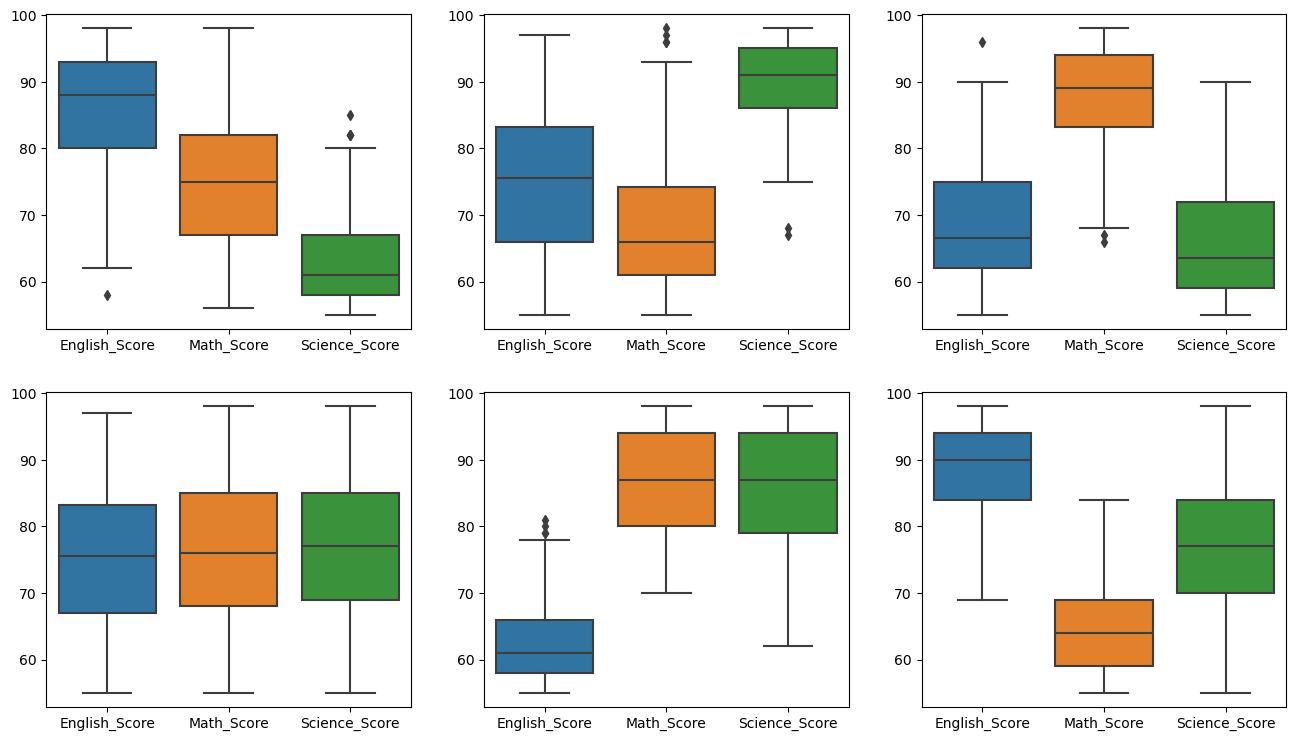

In [141]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2,3,figsize=(16,9))

sns.boxplot(df[df.gmm_pred == 0][['English_Score', 'Math_Score', 'Science_Score']], ax=ax1)
sns.boxplot(df[df.gmm_pred == 1][['English_Score', 'Math_Score', 'Science_Score']], ax=ax2)
sns.boxplot(df[df.gmm_pred == 2][['English_Score', 'Math_Score', 'Science_Score']], ax=ax3)
sns.boxplot(df[df.gmm_pred == 3][['English_Score', 'Math_Score', 'Science_Score']], ax=ax4)
sns.boxplot(df[df.gmm_pred == 4][['English_Score', 'Math_Score', 'Science_Score']], ax=ax5)
sns.boxplot(df[df.gmm_pred == 5][['English_Score', 'Math_Score', 'Science_Score']], ax=ax6)

plt.show()

The GMM clusters has about 4 clusters which are similar to the K means cluster. They are the first, fourth, fifth and sixth cluster.